# Convolutional Neural Network

Diese Woche beschäftigen wir uns mit Convolutional Neural Networks. Convolutional Neural Networks (CNN) werden hauptsächlich, aber nicht ausschließlich, für die Bilderkennung eingesetzt.

Anders als die neuronalen Netze, die wir bisher gesehen haben, können CNNs Bilder als Matrix lesen. Das bedeutet, dass lokale Zusammenhänge nicht durch das `flatten` des Bildes verloren gehen.  

![](https://miro.medium.com/max/1280/1*h01T_cugn22R2zbKw5a8hA.gif)

<centering><h7> Otavio Good. 2017 "A Visual and Intuitive Understanding of Deep Learning" *O'Reilly AI Conference* </h7></centering>

In [3]:
import torch
from torch import nn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from torch.utils import data

def min_max(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

Zunächst laden Sie die Trainingsdaten erneut und wandeln sie in einen `tensor` um. Insgesamt gibt es 60,000 Bilder mit 784 Pixel + eine Spalte für die Labels der Bilder. 

In [4]:
train_data = np.genfromtxt('../data/mnist/mnist_train.csv', delimiter=',', skip_header =False)

train_x = torch.tensor(min_max(train_data[:,1:]), dtype=torch.float32)
train_y = torch.tensor(train_data[:,0], dtype=torch.long)

print(train_x.shape, train_y.shape)

torch.Size([60000, 784]) torch.Size([60000])


Bisher haben wir immer Bilder als 1D-Input in unser neuronales Netz eingegeben. Diesmal wollen wir aber die 2D-Struktur verwenden. Dazu müssen wir aus einem Vektor der Länge `784` eine Matrix mit der Größe `28 x 28` machen.

Dazu können wir die Funktion `vector.view(28,28)` verwenden.

In [5]:
train_x[0,:].view(28,28).shape

torch.Size([28, 28])

Wir können uns dieses Bild ansehen, aber wir können nicht viel erkennen. 

In [6]:
train_x[0,:].view(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

Aber mit `matplotlib` können wir Arrays als Bild darstellen. Hier gibt `cmap = "greys"` an, dass wir unser Farbspektrum nur in Schwarz und Weiß haben wollen.

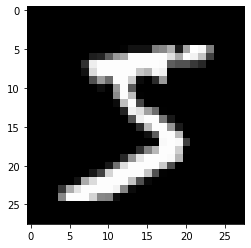

In [7]:
plt.imshow(train_x[0,:].view(28,28), cmap= "gray")

Wir haben bisher nur ein Bild in das richtige Format gebracht, um dies für alle Bilder zu tun, können wir auch `.view()` verwenden. Der `tesnor` von eben hatte das Format `(Höhe,Breite)`. Um alle Bilder konvertieren zu können, müssen wir dem `tensor` eine zusätzliche Dimension hinzufügen.  Der neue `tensor` sollte die folgenden Dimensionen haben: `(Anzahl der Bilder, Höhe, Breite)`. Wir haben also insgesamt drei Dimensionen.

PyTorch würde uns hier jedoch einen Strich durch die Rechnung machen. Denn PyTorch kann sowohl mit schwarz-weißen (s/w) als auch mit farbigen Bildern arbeiten. In PyTorch werden farbige Bilder durch drei Matrizen dargestellt. Eine für Rot, eine für Grün und eine für Blau. Diese werden auch Channels genannt. Ein farbiges Bild hätte in PyTorch die Dimensionen `(3, Höhe, Breite)`. Die Dimension, die wir gerade für die "Anzahl der Bilder" verwendet haben, wird also durch die "Anzahl der Channels" belegt.


![](https://miro.medium.com/max/700/1*icINeO4H7UKe3NlU1fXqlA.jpeg)

<center><h7>Source: Mathanraj Sharma, 2019 </h7></center>

PyTorch erwartet diese "Channel Dimension" auch für s/w Bilder. 
Deshalb stellen wir ein s/w Bild wie folgt da: `(1, Höhe, Breite)`. 

Daraus folgt, dass alle Bilder vom MNIST Datensatz diesem Format entsprechen müssen: `(Anzahl Bilder, 1, Höhe, Breite)`. Also insgesamt hat unser Input `tensor` 4 Dimensionen.



Konvertieren Sie `train_x` zu diesem Format.

In [ ]:
train_x = train_x.view(_____,1,____,____)
train_x.shape

<details>
<summary><b>Lösung:</b></summary>
    
```python 
train_x = train_x.view(60000,1,28,28)
```
</details>

Sie haben nun alle Bilder in das Format `(1,28,28)` konvertiert.
Sie können immer noch Bilder mit `plt.imshow` anzeigen.

Beachten Sie, wie der `tensor` jetzt indiziert ist. `[0,0,:,:]`. Wir wählen das erste Bild und auch den ersten und einzigen Channel aus. Wir wählen zusätzlich die gesamte Höhe und Breite aus, um das Bild vollständig anzuzeigen.

In [8]:
plt.imshow(train_x[0,0,:,:], cmap= "gray")

IndexError: too many indices for tensor of dimension 2

Wie letzte Woche können Sie einen `DataLoader` verwenden. Dazu müssen Sie zuerst ein PyTorch Dataset erstellen. Mit `next(iter())` können Sie den ersten Minibatches des `DataLoaders` ausgeben.

In [ ]:
torch_train = data.TensorDataset(_____, ____)
train_loader = data.DataLoader(______, batch_size=32)

batch_x, batch_y =next(iter(train_loader))
print(batch_x.shape, batch_y.shape)

<details>
<summary><b>Lösung:</b></summary>
    
```python 
torch_train = data.TensorDataset(train_x,train_y)
train_loader = data.DataLoader(torch_train, batch_size=32)

batch_x, batch_y =next(iter(train_loader))
print(batch_x.shape, batch_y.shape)
```
</details>

Wie Sie sehen können, hat der `batch_x` die Dimensionen `[32, 1, 28, 28]`. Also `32` Bilder, die Größe unseres Batches, `1` Channel, `28` Pixel in der Höhe und `28` in der Breite.

## CNNs in PyTorch erstellen.


Soweit haben wir unsere Daten im richtigen Format, jetzt geht es um die Erstellung von `CNN` in PyTorch. Genauso wie es in PyTorch `nn.Linear` Layers gibt, gibt es auch Convolutional Layers im `nn` Modul.

`nn.Conv2d()` ist eine solche Layer. Bevor wir sie benutzen, besprechen wir kurz die wichtigsten Parameter.

- `in_channels` die Anzahl der Channel, die das Bild vor der Convolution hat 
- `out_channels` wie viele Channel das Bild nach der Convolution haben soll. Oder wie viele Filter wir über das Bild laufen lassen.
- `kernel_size` wie groß der Kernel ist, also die Höhe/Breite in Pixeln.





In [11]:
conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3)

In [12]:
out = conv1(batch_x)
out.shape

torch.Size([32, 3, 26, 26])

Wie Sie sehen können, hat sich die Größe des Minibatches geändert. Ursprünglich haben wir immer noch 32 Bilder, aber wie angegeben, haben wir jetzt 3 Channels. Die Höhe und Breite unseres Bildes haben sich ebenfalls geändert. Wir haben 2 Pixel pro Dimension verloren. Das liegt an der Funktionsweise der Convolution.

![](https://miro.medium.com/max/700/1*L4T6IXRalWoseBncjRr4wQ@2x.gif)
<center><h7>Source: Arden Dertat, 2017 </h7></center>


Hier ist ein Beispiel dafür, warum eine Kernelgröße von 3 unser Outputbild um zwei Pixel kleiner macht. Links ist das Inputbild und rechts das Outputbild zu sehen. Da wir den Kernel nicht über den Rand des Bildes schieben können, "verlieren" wir den äußeren Rand des Bildes.

Um zu verhindern, dass diese Informationen verloren gehen, können wir das Bild *padden*. Auf diese Weise vergrößern wir das Bild, zum Beispiel mit Pixeln, die den Wert Null haben.

![](https://miro.medium.com/max/700/1*W2D564Gkad9lj3_6t9I2PA@2x.gif)
<center><h7>Source: Arden Dertat, 2017 </h7></center>

Durch das Padding, kann der Kernel einmal über das gesamte Bild geschoben werden.
Wir können die Breite des Paddings auch als Parameter in `Conv2d` mitgeben.

In [13]:
conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding =1)
out = conv1(batch_x)
out.shape

torch.Size([32, 3, 28, 28])

Durch das Padding schrumpft das Bild nicht mehr. Da wir jetzt `3` Channels haben, können wir das Bild immer noch mit `plt.imshow` anzeigen.  Dazu müssen wir ein Bild aus dem Minibatch auswählen und den Befehl `detach()` verwenden, um die von `autograd` gespeicherten Gradienten zu entfernen.

*Ein Bild wie dieses kann nur als Beispiel verwendet werden, um die Transformation zu veranschaulichen. Die tatsächlichen Farben und Intensitäten sind hier irrelevant, da diese vom Netzwerk willkürlich festgelegt sind.* 

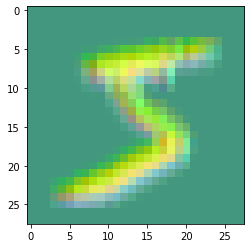

In [14]:
plt.imshow(min_max(out.detach().numpy()[0].transpose((1, 2, 0))))

Sie können immer noch eine 5 erkennen, aber dieses Mal in Farbe. Wie oben beschrieben, sind die Farben nicht zur Interpretation geeignet. Sie dienen nur dazu, die Diversifizierung des Inputs zu verdeutlichen. 

Die zweite neue Layer, die Sie heute verwenden werden, ist `nn.MaxPool2d()`. 

Diese Ebene wird als **Pooling**-Layer bezeichnet.


![](https://miro.medium.com/max/700/1*ReZNSf_Yr7Q1nqegGirsMQ@2x.png)
<center><h7>Source: Arden Dertat, 2017 </h7></center>

Das Pooling Layers führen zu einer bewussten Reduzierung der Bildgröße tiefer im Netzwerk. Dies bedeutet, dass weniger Parameter (Weights) benötigt werden, was dazu führt, dass unsere Netzwerke schneller trainieren. Wenn Sie ein Bild (größer als 28 x 28 Pixel) betrachten, erkennen Sie nicht jeden einzelnen Pixel, sondern Pixel in einer bestimmten Nähe verschmelzen miteinander. Pooling funktioniert auf ähnliche Weise. Hier werden mehrere Pixel mit Hilfe des Maximalwertes kombiniert.
Weniger Parameter bedeuten auch eine geringere Wahrscheinlichkeit auf Overfitting. 

Die am häufigsten verwendete Pooling Layer ist die Max-Pooling Layer. Hier wird der größte Wert in der Region als neuer Wert für den Output gewählt. Es gibt natürlich eine Vielzahl anderer [Pooling]-Layers(https://pytorch.org/docs/stable/nn.html#pooling-layers).
Neben der Kernelgröße, der Größe des Quadrats, das wir zusammenfassen wollen, geben wir diesmal auch den `stride` an. Der Stride legt fest, um wie viele Pixel wir den Pooling Kernel verschieben. 

![](https://www.oreilly.com/library/view/machine-learning-for/9781786469878/assets/09ad7edc-334f-4c54-944b-af21139b0587.png)
<center><h7>Source: Rodolfo Bonnin - Machine Learning for Developers </h7></center>


[Hier](https://ezyang.github.io/convolution-visualizer/index.html) ist eine Website mit der Sie den Effekt von verschiedenen Parametern auf die Convolution visualisieren können.

In [15]:
pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)

Sie können nun den Output des 2DConv (`out`) als Input für die Pooling-Layer verwenden.  

In [ ]:
out2 = pool1(____)
out2.shape

<details>
<summary><b>Lösung:</b></summary>
    
```python 
out2 = pool1(out)
```
</details>

Da sich an der Anzahl der Channels nichts geändert hat, können wir dieses Bild immer noch visualisieren.
Wir können sehen, dass das Bild geschrumpft ist, dennoch kann man die 5 noch sehen.

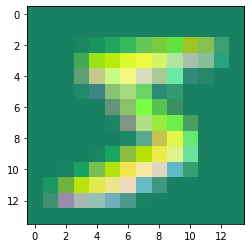

In [17]:
plt.imshow(min_max(out2.detach().numpy()[0].transpose((1, 2, 0))))

Mit `nn.Sequential` kann man auch mehrere Convolution/Pooling Layers hintereinander schalten. Wichtig, wir brauchen auch wieder eine nichtlineare Aktivierungsfunktion, diese wird normalerweise nach der Convolution eingefügt.

Füllen Sie den fehlenden Code:

In [ ]:
cnn = nn.Sequential(nn.Conv2d(in_channels=_, out_channels=3, kernel_size=3, padding =1),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size = 2,stride = 2),
                   nn.Conv2d(in_channels= _ , out_channels=6, kernel_size=3, padding =1),
                   nn.______,
                   nn.MaxPool2d(kernel_size = 2,stride = 2))

<details>
<summary><b>Lösung:</b></summary>
    
```python 
cnn = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding =1),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size = 2,stride = 2),
                   nn.Conv2d(in_channels= 3 , out_channels=6, kernel_size=3, padding =1),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size = 2,stride = 2))
```
</details>

Jetzt können wir den Batch `batch_x` einmal durch das Netzwerk führen. 

In [20]:
cnn(batch_x).shape

torch.Size([32, 6, 5, 5])

Diese Output ist jedoch noch nicht für Vorhersagen geeignet. Dazu müssen wir die Bilder wieder in ein herkömmliches neuronales Netz einspeisen. Diese akzeptieren jedoch nur Inputs in Form von Vektoren. Also konvertieren wir jedes Bild zurück in einen Vektor. 

Der Output `tensor` hat die `shape` `[32, 6, 5, 5]` und sollte zu einem `tensor` der Größe `[32, 6 x 5 x 5]` = `[32, 150]` werden.

Dazu können wir die Layer `nn.Flatten(starting_dim)` verwenden. Hier müssen wir nur den Parameter `starting_dim` definieren. Dieser bestimmt, ab welcher Dimension wir die Dimensionen zusammenführen. Da wir für jedes Bild einen eigenen Vektor wollen, verwenden wir `starting_dim = 1`. Mit `cnn.add_module()` können wir zusätzliche Layers zu unserem Netzwerk hinzufügen.



In [21]:
cnn.add_module("flatten",nn.Flatten(1))

In [22]:
cnn(batch_x).shape

torch.Size([32, 150])

Die Größe des Batches ist jetzt `(32,150)`. `32` ist immer noch die Anzahl der Bilder im Batch (Dimension 0), aber unsere zweite Dimension ist jetzt `150`. Das heißt, jedem Bild im Stapel ist ein Vektor zugeordnet. Jetzt können wir auch eine traditionelle lineare Layer hinzufügen. Vor der Layer `nn.Linear` fügen wir jedoch eine zusätzliche BatchNorm und eine Dropout-Layer hinzu.

In [ ]:
cnn.add_module("bn", nn.BatchNorm1d(____))
cnn.add_module("dp", nn._________(0.2))
cnn.add_module("fc", nn.Linear(____,___))

<details>
<summary><b>Lösung:</b></summary>
    
```python 
cnn.add_module("bn", nn.BatchNorm1d(150))
cnn.add_module("dp", nn.Dropout(0.2))
cnn.add_module("fc", nn.Linear(150,10))
```
</details>

Nun können Sie die Loss Funktion und Optimizer festlegen. Durch das Benutzen von PyTorchs `loaders` und dem `nn` Modul, können Sie denselben `for-loop` von letzter Woche ohne Änderung kopieren. 

In [ ]:
loss_funktion = nn.CrossEntropyLoss()
updaten =  torch.optim.Adam(_____________, lr =0.001)

<details>
<summary><b>Lösung:</b></summary>
    
```python 
loss_funktion = nn.CrossEntropyLoss()
updaten =  torch.optim.Adam(cnn.parameters(), lr =0.001)
```
</details>


In [9]:
EPOCHS = 2
for i in range(EPOCHS):
    loss_list = [] # diese Liste speichtert den Loss jedes Minibatches
    cnn.train() 
    for minibatch in train_loader: # for-loop geht durch alle mMinibatches
        images, labels = minibatch # Minibatch wird in Bilder und Labels geteilt

        updaten.zero_grad()
        output = cnn(images) # Forward Propagation
        loss   = loss_funktion(output, labels)
        loss.backward()
        loss_list.append(loss.item())
        updaten.step()
    cnn.eval()    
    output = cnn(train_x)
    train_acc=((output.max(dim=1)[1]==train_y).sum()/float(output.shape[0])).item()
    print(
        "Training Loss: %.2f Training Accuracy: %.2f"
        % (np.mean(loss_list), train_acc)
    )

NameError: name 'cnn' is not defined

Zuletzt evaluieren wir das Netzwerk auf dem Testdatensatz.

In [ ]:
test_data = np.genfromtxt('../data/mnist/mnist_test.csv', delimiter=',', skip_header =False)
test_x = torch.tensor(min_max(test_data[:,1:]), dtype=torch.float32)
test_y = torch.tensor(test_data[:,0], dtype=torch.long)
test_x = test_x.reshape(test_x.shape[0],1,28,28)
print(test_x.shape, test_y.shape)

In [ ]:
output = cnn(test_x)
acc=((output.max(dim=1)[1]==test_y).sum()/float(output.shape[0])).item()
acc

# Übungsaufgabe

Wieder verwenden wir die Toxizitätsdaten für die Übungsaufgabe. Diesmal liegen die Moleküle jedoch nicht im SMILES-Format vor, sondern die Strukturen sind als Bild gespeichert. **Sie werden wieder die Toxizität vorhersagen, aber dieses Mal auf der Grundlage des Bildes**. 

In der Tat ist dies [bereits versucht worden](https://www.sciencedirect.com/science/article/abs/pii/S0169743919303417). 

Die Bilder bestehen aus `64 x 64` Pixeln. Sie werden sehen, dass dies kaum ausreicht, um die Molekularstruktur zu erkennen.  Wir sind jedoch an den von der Universität zur Verfügung gestellten Speicherplatz gebunden.
Tatsächlich ändert in diesem Fall aber eine höhere Auflösung nichts am Problem.

## Starten Sie den Kernel neu, bevor Sie die Aufgabe starten!


In [10]:
import numpy as np
import torch
from torch import nn
from torch.utils import data
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import torchvision.transforms as T
def min_max(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

Teilen Sie zunächst den Datensatz in Traings- und Testset.

In [194]:
mol_img_data = torch.tensor(np.genfromtxt('../data/toxicity/molasimg.csv', delimiter=',', skip_header =False),dtype=torch.float32)
train, test=train_test_split(_______________,______________,_________, random_state=1234)

train_x = train[______]
train_y = train[______]
test_x = test[______]
test_y = test[______]


print(train_x.shape, train_y.shape)

torch.Size([1796, 4096]) torch.Size([1796])


So verpixelt sehen die Bilder aus:

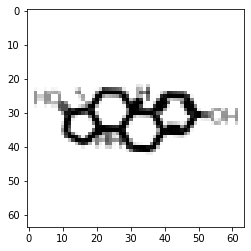

In [195]:
plt.imshow(train_x[10,:].view(64,64), cmap= "gray")

Als nächstes konvertieren Sie das Test- und Trainingsset. Denken Sie daran, dass die Dimensionen wie folgt ausehen sollen. `Anzahl Bilder, Anzahl Channel, Höhe, Breite`.

In [196]:
train_x = train_x.view(__________________________)
test_x = test_x.view(___________________________)

In [197]:
torch_train = data.TensorDataset(______________________)
train_loader = data.DataLoader(__________________, batch_size=32)

batch_x, batch_y =next(iter(train_loader))
print(batch_x.shape, batch_y.shape)

torch.Size([32, 1, 64, 64]) torch.Size([32])


Wenn Sie bis jetzt alles richtig gemacht haben, sollte `batch_x` die Dimensionen `[32, 1, 64, 64]` und `batch_y` die Dimensionen `[32]` haben. Füge dem Netz mindestens 2 weitere Convolutionlayers hinzu. Stellen Sie sicher, dass Sie auch Pooling-Layers und nicht-lineare Aktivierungsfunktionen verwenden.

In [198]:
cnn = nn.Sequential(nn.Conv2d(in_channels= , out_channels , kernel_size , padding ),
                   
                   
                    
                   
                   
                   )

In [199]:
cnn(batch_x).shape

torch.Size([32, 12, 6, 6])

Fügen Sie nun eine `Flatten` Layer hinzu. Ab welcher Dimension fangen wir an die Werte zusammen zu fügen?

In [200]:
cnn.add_module("flatten",nn.Flatten(_))

In [201]:
cnn(batch_x).shape

torch.Size([32, 432])

Als letztes fügen Sie eine `BatchNorm`, `Dropout` und `Linear` hinzu. Achten Sie hierbei auf die richtigen Input/ Output Dimensionen. 

In [210]:
cnn.add_module("bn", _______________)
cnn.add_module("dp", _______________)
cnn.add_module("fc", _______________)

In [211]:
cnn(batch_x).shape

torch.Size([32, 1])

Die `shape` solte jetzt `[32, 1]` sein. Füllen Sie den Rest des Trainingsloops aus. 

In [208]:
loss_funktion = ________________________
updaten =  torch.optim.Adam(_______________, lr =0.0003)
EPOCHS = 30


for i in range(EPOCHS):
    loss_list = [] # diese Liste speichter den Loss jedes Minibatches
    
    ___.train() 
    for minibatch in train_loader: # for-loop geht durch alle minibatches
        images, labels = minibatch # minibatch wird in Bilder und Labels geteilt
        ________.zero_grad()
        output = cnn(_______) # Forward Propagation
        loss   = loss_funktion(output.squeeze(), labels)
        loss.backward()
        loss_list.append(loss.item())
        updaten.step()
    ___.eval()    
    
    # Trainings Evaluation
    output = cnn(train_x)
    train_acc = torch.sum((output>0).squeeze().int() == train_y)/train_y.shape[0]
    # Test Evaluation
    output = cnn(test_x)
    loss   = loss_funktion(output.squeeze(), test_y)
    test_acc = torch.sum((output>0).squeeze().int() == test_y)/test_y.shape[0]
    
    print(
        "Training Loss: %.2f Training Accuracy: %.2f | Test Loss: %.2f  Test Accuracy: %.2f"
        % (np.mean(loss_list), train_acc, loss.item(),test_acc )
    )

Training Loss: 0.70 Training Accuracy: 0.59 | Test Loss: 0.68  Test Accuracy: 0.58
Training Loss: 0.67 Training Accuracy: 0.63 | Test Loss: 0.67  Test Accuracy: 0.61
Training Loss: 0.65 Training Accuracy: 0.64 | Test Loss: 0.67  Test Accuracy: 0.63
Training Loss: 0.64 Training Accuracy: 0.64 | Test Loss: 0.65  Test Accuracy: 0.61
Training Loss: 0.63 Training Accuracy: 0.67 | Test Loss: 0.64  Test Accuracy: 0.64
Training Loss: 0.62 Training Accuracy: 0.64 | Test Loss: 0.89  Test Accuracy: 0.66
Training Loss: 0.62 Training Accuracy: 0.66 | Test Loss: 0.63  Test Accuracy: 0.65
Training Loss: 0.61 Training Accuracy: 0.67 | Test Loss: 0.64  Test Accuracy: 0.65
Training Loss: 0.60 Training Accuracy: 0.69 | Test Loss: 0.62  Test Accuracy: 0.66
Training Loss: 0.60 Training Accuracy: 0.69 | Test Loss: 0.62  Test Accuracy: 0.66
Training Loss: 0.59 Training Accuracy: 0.69 | Test Loss: 0.62  Test Accuracy: 0.65
Training Loss: 0.61 Training Accuracy: 0.68 | Test Loss: 0.63  Test Accuracy: 0.64
Trai

Wie Sie sehen können, funktioniert das nur mäßig. Mit FIngerprints funktioniert es definitiv besser.
Grundsätzlich ist es schwieriger, CNNs zu trainieren als simplere neuronale Netzwerke. 
Darüber hinaus ist die grafische Darstellung von Molekülen im Vergleich zu SMILES oder Fingerprints/Deskriptoren sehr ineffizient. 

In unserem Fall könnte man argumentieren, dass unser Modell auch besser lernen könnte, wenn wir größere und farbige Bilder hätten. Das ist wahrscheinlich richtig. Aber selbst in der oben genannten Veröffentlichung konnten die CNNs einfach Netzwerke mit FIngerpints nicht schlagen.
Man kann sagen, dass Bilder keine angemessene Darstellung von Molekülen sind. Zumindest nicht für das maschinelle Lernen.

Das soll nicht heißen, dass es nicht nützlich sein kann, CNN auf Bildern von Molekülen zu trainieren. 
Zum Beispiel Netzwerke, die Strukturen erkennen und die entsprechenden SMILES ausgeben. Dies kann dazu verwendet werden, Patente und chemische Veröffentlichungen schnell zu durchsuchen.


Wie zum Beispiel hier:
https://jcheminf.biomedcentral.com/articles/10.1186/s13321-021-00538-8